In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [114]:
df=pd.read_csv("titanic-passengers.csv",delimiter=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [115]:
df.isnull().sum() #first_test

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
df["Age"].fillna(df['Age'].mean(),inplace=True)
df["Cabin"].fillna('G6',inplace=True)
df['Embarked'].fillna('S',inplace=True)

In [117]:
df.isnull().sum() #second_test

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [118]:
df.Survived.value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [119]:
l=list()
for i in range(df['Name'].value_counts().sum()):
    l.append(df["Name"][i][df["Name"][i].find(',')+2:df["Name"][i].find('.')])
df['Title']=l
df=df.drop("Name", axis=1)

In [120]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
cleanup_nums={"Title":Title_Dictionary}
df.replace(cleanup_nums,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,G6,S,Mrs
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,No,3,male,20.0,0,0,350050,7.8542,G6,S,Mrs
3,568,No,3,female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


In [121]:
l=list()
for i in range(df['SibSp'].value_counts().sum()):
    l.append(df['SibSp'][i]+df['Parch'][i])
df['FamilySize']=l
df=df.drop(["Parch","SibSp"], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,male,28.0,248740,13.0000,G6,S,Mrs,0
1,76,No,3,male,25.0,348123,7.6500,F G73,S,Mrs,0
2,641,No,3,male,20.0,350050,7.8542,G6,S,Mrs,0
3,568,No,3,female,29.0,349909,21.0750,G6,S,Mrs,4
4,672,No,1,male,31.0,F.C. 12750,52.0000,B71,S,Mrs,1


In [122]:
# based on the data visualisation done in the 3rd checkpoint, we got to the conclusion: usefull features for our problem are:
# {"Age","Sex","Title","FamilySize","Pclass"}

In [123]:
#preparing data for logistic regression
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0}) #convert admitted variable into numerical
df["Sex"]=df["Sex"].map({"male": 1, "female": 0})
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Title"]=encoder.fit_transform(df["Title"])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,1,28.0,248740,13.0000,G6,S,2,0
1,76,0,3,1,25.0,348123,7.6500,F G73,S,2,0
2,641,0,3,1,20.0,350050,7.8542,G6,S,2,0
3,568,0,3,0,29.0,349909,21.0750,G6,S,2,4
4,672,0,1,1,31.0,F.C. 12750,52.0000,B71,S,2,1


In [124]:
#features extraction
x = df[["Age","Sex","Title","FamilySize","Pclass"]]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

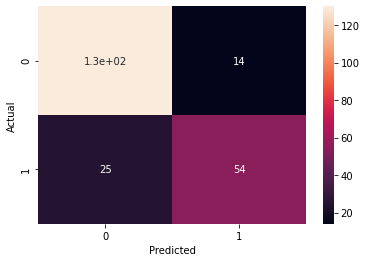

In [131]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.79      0.68      0.73        79

    accuracy                           0.83       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.83      0.82       223



In [ ]:
#The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.
#It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

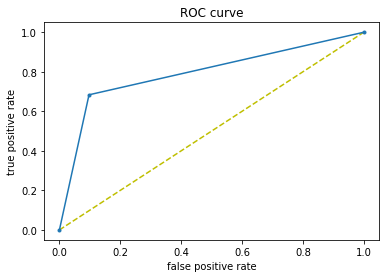

In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

In [136]:
from sklearn.metrics import auc
auc_value=auc(fpr,tpr)
print('Area under curve ,AUC=',auc_value)

Area under curve ,AUC= 0.7931610407876231
